In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
from functools import reduce
import matplotlib.patches as mpatches

In [28]:
cat=pd.read_csv("well_position_iter_0_v1.csv")

In [30]:
cat["Position"]=cat["Position"].str.slice(start=1)

In [31]:
cat["category"]=cat["name"].str.slice(stop=-2)

In [33]:
cat.sort_values("Position")

,name,Position,category
43,3_85_17_mM_3,B10,3_85_17_mM
28,4_71_188_mM_1,B2,4_71_188_mM
12,2_14_222_mM_1,B3,2_14_222_mM
39,3_85_17_mM_1,B4,3_85_17_mM
37,Reference_M9_2,B5,Reference_M9
11,3_85_17_mM_2,B6,3_85_17_mM
33,3_0_154_mM_2,B7,3_0_154_mM
19,3_0_154_mM_3,B8,3_0_154_mM
10,Control_M9_no_bacteria_3,B9,Control_M9_no_bacteria
21,2_14_222_mM_3,C10,2_14_222_mM


In [34]:
ly=list(pd.unique(cat["category"]))

In [35]:
ordi=[1,2,7,8,4,9,5,3,6]

In [36]:
print(ly)
print(ordi)

['0_43_120_mM', '1_28_51_mM', '5_57_85_mM', 'Control_M9_no_bacteria', '3_0_154_mM', 'Reference_M9', '3_85_17_mM', '2_14_222_mM', '4_71_188_mM']
[1, 2, 7, 8, 4, 9, 5, 3, 6]


In [37]:
blocks={"G2":1,"G3":1,"G4":1,"F2":1,"F3":1,"F4":1,"E2":1,"E3":1,"E4":1,
        "G5":2,"G6":2,"G7":2,"F5":2,"F6":2,"F7":2,"E5":2,"E6":2,"E7":2,
        "G8":3,"G9":3,"G10":3,"F8":3,"F9":3,"F10":3,"E8":3,"E9":3,"E10":3,
        "D2":4,"D3":4,"D4":4,"C2":4,"C3":4,"C4":4,"B2":4,"B3":4,"B4":4,
        "D5":5,"D6":5,"D7":5,"C5":5,"C6":5,"C7":5,"B5":5,"B6":5,"B7":5,
        "D8":6,"D9":6,"D10":6,"C8":6,"C9":6,"C10":6,"B8":6,"B9":6,"B10":6}

In [38]:
dictio=dict(zip(ly,ordi))

In [39]:
cat["condition"]=cat["category"].apply(lambda x: dictio[x])
cat["block"]=cat["Position"].apply(lambda x: blocks[x])

In [42]:
cat.sort_values("Position")

,name,Position,category,condition,block
43,3_85_17_mM_3,B10,3_85_17_mM,5,6
28,4_71_188_mM_1,B2,4_71_188_mM,6,4
12,2_14_222_mM_1,B3,2_14_222_mM,3,4
39,3_85_17_mM_1,B4,3_85_17_mM,5,4
37,Reference_M9_2,B5,Reference_M9,9,5
11,3_85_17_mM_2,B6,3_85_17_mM,5,5
33,3_0_154_mM_2,B7,3_0_154_mM,4,5
19,3_0_154_mM_3,B8,3_0_154_mM,4,6
10,Control_M9_no_bacteria_3,B9,Control_M9_no_bacteria,8,6
21,2_14_222_mM_3,C10,2_14_222_mM,3,6


In [50]:
cat2=cat.sort_values(["block","Position"]).copy()

In [51]:
repi=dict(zip(cat2["Position"],cat2["name"]))
condi=dict(zip(cat2["Position"],cat2["category"]))

In [52]:
memi=dict(zip(cat2["Position"],cat2["condition"]))

In [53]:
[condi[i] for i in list(blocks.keys())]

['3_0_154_mM',
 '3_85_17_mM',
 '5_57_85_mM',
 '0_43_120_mM',
 'Reference_M9',
 '1_28_51_mM',
 'Control_M9_no_bacteria',
 '2_14_222_mM',
 '4_71_188_mM',
 '2_14_222_mM',
 '3_0_154_mM',
 '1_28_51_mM',
 '0_43_120_mM',
 'Control_M9_no_bacteria',
 '4_71_188_mM',
 '3_85_17_mM',
 'Reference_M9',
 '5_57_85_mM',
 'Reference_M9',
 '1_28_51_mM',
 '0_43_120_mM',
 '3_85_17_mM',
 'Control_M9_no_bacteria',
 '4_71_188_mM',
 '5_57_85_mM',
 '3_0_154_mM',
 '2_14_222_mM',
 '5_57_85_mM',
 '1_28_51_mM',
 'Reference_M9',
 'Control_M9_no_bacteria',
 '0_43_120_mM',
 '3_0_154_mM',
 '4_71_188_mM',
 '2_14_222_mM',
 '3_85_17_mM',
 '4_71_188_mM',
 '5_57_85_mM',
 'Control_M9_no_bacteria',
 '1_28_51_mM',
 '2_14_222_mM',
 '0_43_120_mM',
 'Reference_M9',
 '3_85_17_mM',
 '3_0_154_mM',
 '1_28_51_mM',
 'Reference_M9',
 '5_57_85_mM',
 '4_71_188_mM',
 '0_43_120_mM',
 '2_14_222_mM',
 '3_0_154_mM',
 'Control_M9_no_bacteria',
 '3_85_17_mM']

In [62]:
posi=pd.DataFrame({"Position":list(blocks.keys())})

In [63]:
cat3=posi.merge(cat2)

In [64]:
cat3

,Position,name,category,condition,block
0,G2,3_0_154_mM_4,3_0_154_mM,4,1
1,G3,3_85_17_mM_4,3_85_17_mM,5,1
2,G4,5_57_85_mM_4,5_57_85_mM,7,1
3,F2,0_43_120_mM_4,0_43_120_mM,1,1
4,F3,Reference_M9_4,Reference_M9,9,1
5,F4,1_28_51_mM_4,1_28_51_mM,2,1
6,E2,Control_M9_no_bacteria_4,Control_M9_no_bacteria,8,1
7,E3,2_14_222_mM_4,2_14_222_mM,3,1
8,E4,4_71_188_mM_4,4_71_188_mM,6,1
9,G5,2_14_222_mM_5,2_14_222_mM,3,2


G2 1
G3 1
G4 1
G5 2
G6 2
G7 2
G8 3
G9 3
G10 3
F2 1
F3 1
F4 1
F5 2
F6 2
F7 2
F8 3
F9 3
F10 3
E2 1
E3 1
E4 1
E5 2
E6 2
E7 2
E8 3
E9 3
E10 3
D2 4
D3 4
D4 4
D5 5
D6 5
D7 5
D8 6
D9 6
D10 6
C2 4
C3 4
C4 4
C5 5
C6 5
C7 5
C8 6
C9 6
C10 6
B2 4
B3 4
B4 4
B5 5
B6 5
B7 5
B8 6
B9 6
B10 6


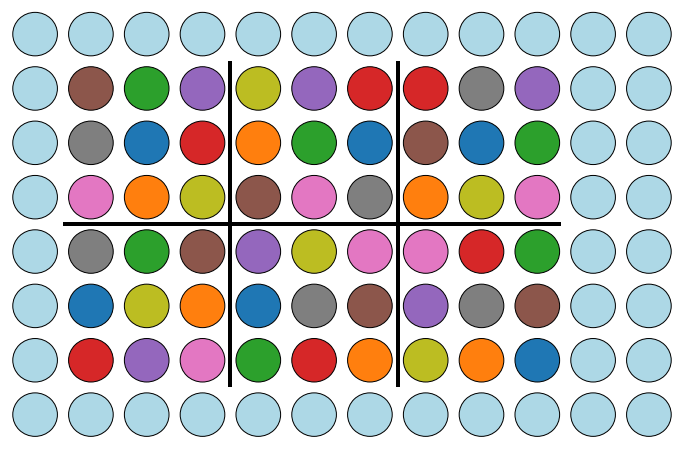

In [80]:
dim=2
iteration=0

# Define the number of rows and columns of the microplate
num_rows = 8
num_cols = 12

# Define the well size and radius
well_size = 1.2
well_radius = well_size / 2

columns_labels=[i+1 for i in range(0,12)]
rows_labels=list(reversed(list(string.ascii_uppercase)[0:8]))

xlabel_pos=[0.6+1.2*i for i in range (0,12)]
ylabel_pos=[0.6+1.2*i for i in range (0,8)]

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Create a 2D array to represent the microplate
plate = np.zeros((num_rows, num_cols))

# Define the randomized complete block design
#conditions = [1, 2, 3, 4, 5, 6, 7, 8, 9]
#blocks = [1, 2, 3, 4, 5, 6]
#design = []
#for block in blocks:
#    design += np.random.permutation(conditions).tolist()
design=cat3["condition"].tolist()
data = []
# Loop over each well in the microplate and plot a circle with color
for row in range(num_rows):
    for col in range(num_cols):
        x = col * well_size + well_radius
        y = row * well_size + well_radius
        well_position = rows_labels[row] + str(col + 1)
        #print(well_position)
        if row in range(1, 7) and col in range(1, 10):
            block_row = (row - 1) // 3   #floored quotient
            block_col = (col - 1) // 3
            block = block_row * 3 + block_col + 1
            print(well_position,block)
            block_design = design[(block - 1) * 9:block * 9]
            well_row = (row - 1) % 3
            well_col = (col - 1) % 3
            if block_design[well_row * 3 + well_col]==8:
                condition = str(iteration)+"_REF"
                replicate=  str(iteration)+"_REF_"+str(block)
            elif block_design[well_row * 3 + well_col]==9:
                condition = str(iteration)+"_CTRL"
                replicate=  str(iteration)+"_CTRL_"+str(block)
            else:
                nami=condi[well_position].split("_")
                prix=nami[0]+"."+nami[1]+"%/"+nami[2]+nami[3]
                condition = prix#str(iteration)+"_"+str(block_design[well_row * 3 + well_col])
                replicate=  repi[well_position]#str(iteration)+"_"+str(block_design[well_row * 3 + well_col])+"_"+str(block)
            color = plt.cm.get_cmap('tab10')(block_design[well_row * 3 + well_col] - 1)
        else:
            color = 'lightblue'
            condition = "water"
            replicate=""
        circle = plt.Circle((x, y), well_radius * 0.8, fill=True, edgecolor='black', linewidth=1, facecolor=color)
        plt.gca().add_patch(circle)
        data.append((well_position, condition,replicate,color))
        
df = pd.DataFrame(data, columns=['well_position', 'sample','replicate',"color"])
df=df.sort_values("well_position")

# Set the axis limits and labels
plt.xlim([0, num_cols * well_size])
plt.ylim([0, num_rows * well_size])

#plt.xticks(xlabel_pos,columns_labels,fontsize=20)
#plt.yticks(ylabel_pos,rows_labels,fontsize=20)

codf=df.groupby("sample").head(1).sort_values("sample")

legi=[mpatches.Patch(color=i["color"], label=i["sample"]) for ind,i in codf.iterrows()]

#plt.legend(handles=legi,bbox_to_anchor=(1, 1),fontsize=15)
plt.vlines(x = [4.8,8.4], ymin = 1.2, ymax = 8.4,color="black",linewidth=4)
plt.hlines(y = [4.8], xmin = 1.2, xmax = 11.9,color="black",linewidth=4)
plt.axis('off')
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False)
plt.savefig("iteration_0_layout_recovered.jpg",bbox_inches="tight",dpi=400)
plt.show()
plt.close()

In [82]:
codf.to_csv("iteration_0_color_table.csv",index=False)

In [83]:
#df.to_csv("try.csv",index=False)

In [84]:
#cat.sort_values("condition")